# Decision Trees
This notebook implements decision trees.  It uses the Parkinsons dataset from the UCI Machine Learning Repository:

https://archive.ics.uci.edu/ml/datasets/Parkinsons

In [1]:
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt

# sklearn
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

## Data

In [2]:
# load parkinsons dataset
data = pd.read_csv('parkinsons.data')

In [3]:
# drop the name column
data.drop(['name'], axis=1, inplace=True)

In [4]:
# divide into X and y
y = data['status']
X = data.drop(['status'], axis=1)

Text(0.5, 1.0, 'Proportion of Parkinsons in Dataset')

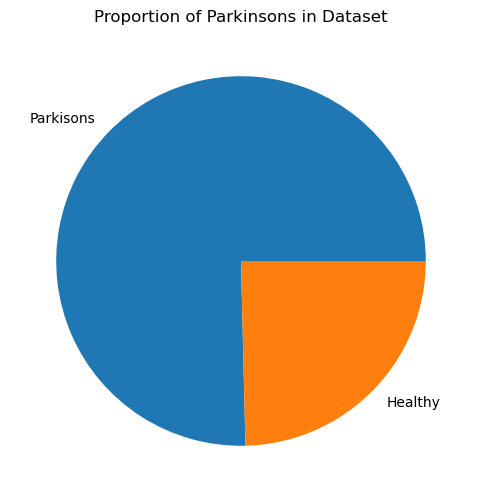

In [19]:
fig, ax = plt.subplots(figsize=(6,6))
ax.pie([sum(y)/len(y), 1-sum(y)/len(y)], labels=['Parkisons', 'Healthy']);
ax.set_title('Proportion of Parkinsons in Dataset')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

## Classification Tree

In [7]:
tree_clf = tree.DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

In [8]:
print('Depth of the classification tree: ', tree_clf.get_depth())

Depth of the classification tree:  6


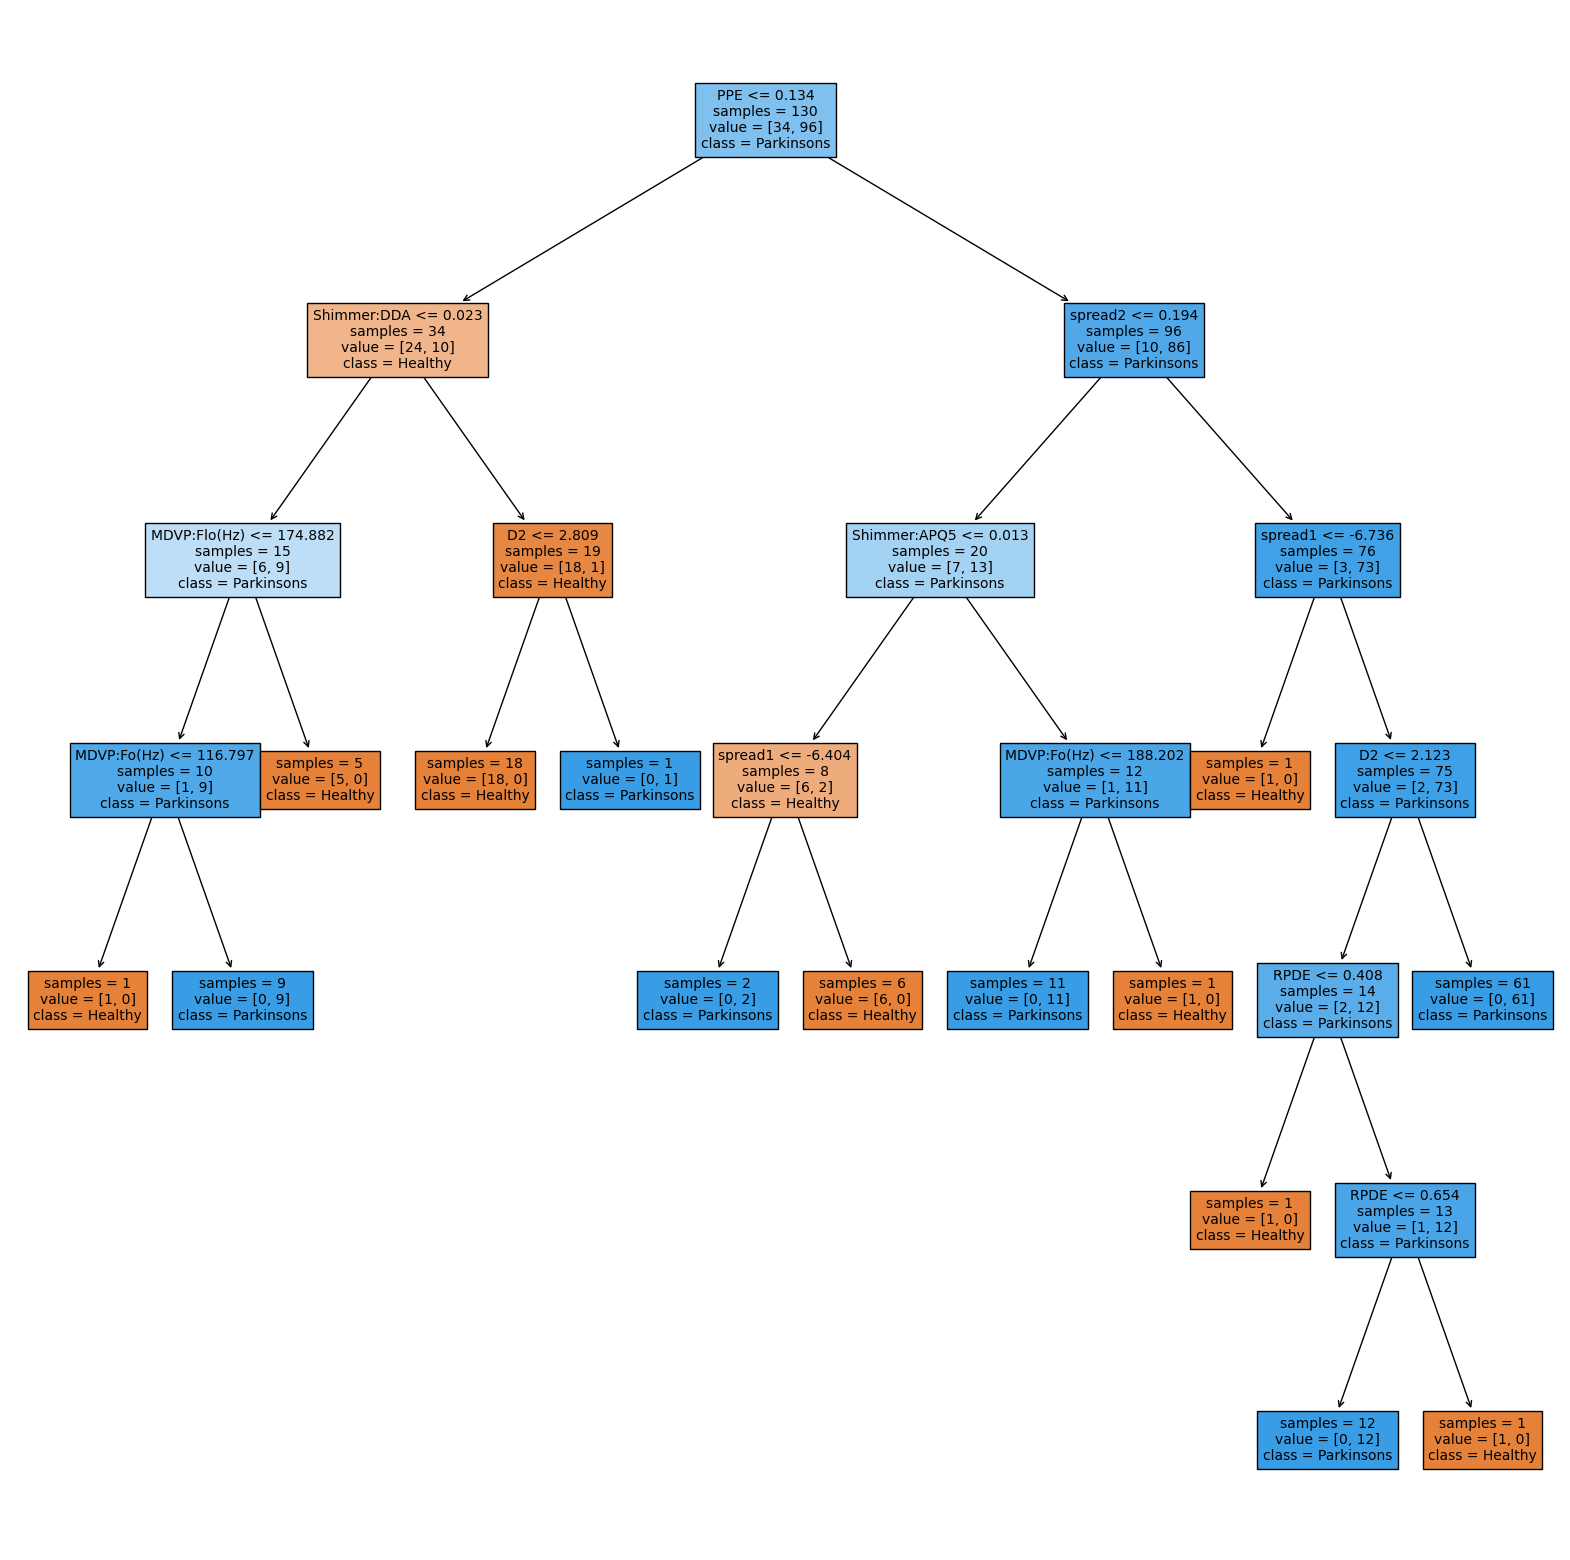

In [9]:
# display the tree
fig, ax = plt.subplots(figsize=(20,20))
tree.plot_tree(tree_clf, 
               feature_names = X_test.columns, 
               class_names = ['Healthy', 'Parkinsons'],
               filled = True,
               fontsize = 10,
               impurity = False,
               ax=ax);

Evaluate on test set

In [10]:
tree_accuracy = accuracy_score(y_test, tree_clf.predict(X_test))
print('Classification accuracy: ', tree_accuracy)

Classification accuracy:  0.9076923076923077


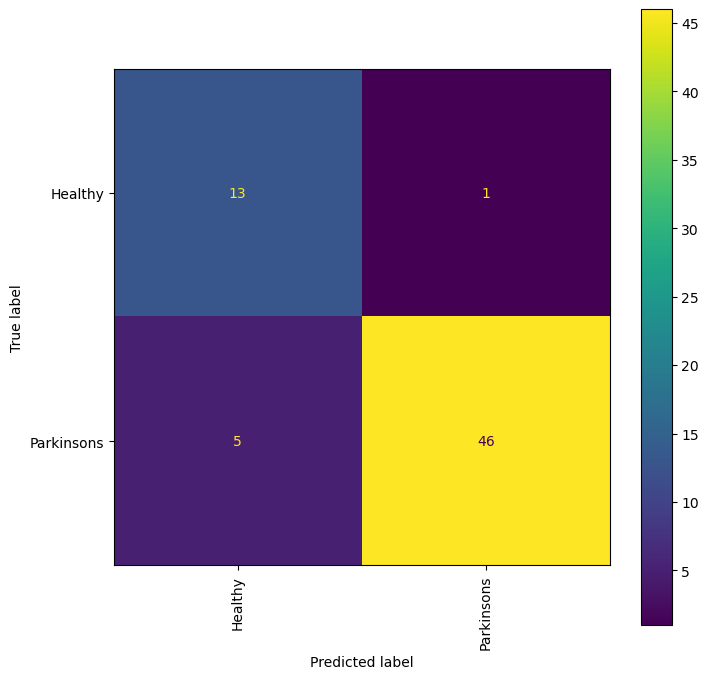

In [11]:
# confusion matrix
y_pred = tree_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=['Healthy', 'Parkinsons'])
fig, ax = plt.subplots(figsize=(8,8))
cm_display.plot(ax=ax, xticks_rotation='vertical')

Feature Importance

Text(0.5, 1.0, 'Feature Importance')

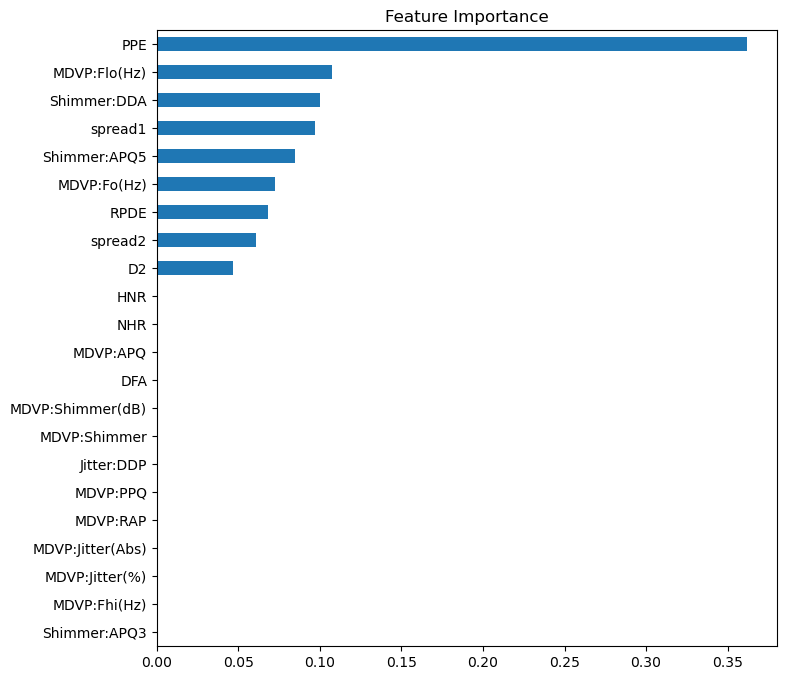

In [24]:
importances = tree_clf.feature_importances_
tree_importances = pd.Series(importances, index=X.columns)
fig, ax = plt.subplots(figsize=(8,8))
tree_importances.sort_values().plot.barh(ax=ax)
ax.set_title('Feature Importance')

Pruning the tree

In [13]:
alphas = tree.DecisionTreeClassifier(random_state=0).cost_complexity_pruning_path(X_train, y_train)

In [14]:
alphas

{'ccp_alphas': array([0.        , 0.00998291, 0.01384615, 0.01410256, 0.01438327,
        0.0145749 , 0.02307692, 0.02815452, 0.04008812, 0.13985439]),
 'impurities': array([0.        , 0.02994872, 0.04379487, 0.05789744, 0.0722807 ,
        0.0868556 , 0.10993252, 0.16624157, 0.2464178 , 0.38627219])}

In [15]:
pruned_tree = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=alphas['ccp_alphas'][2]).fit(X_train, y_train)

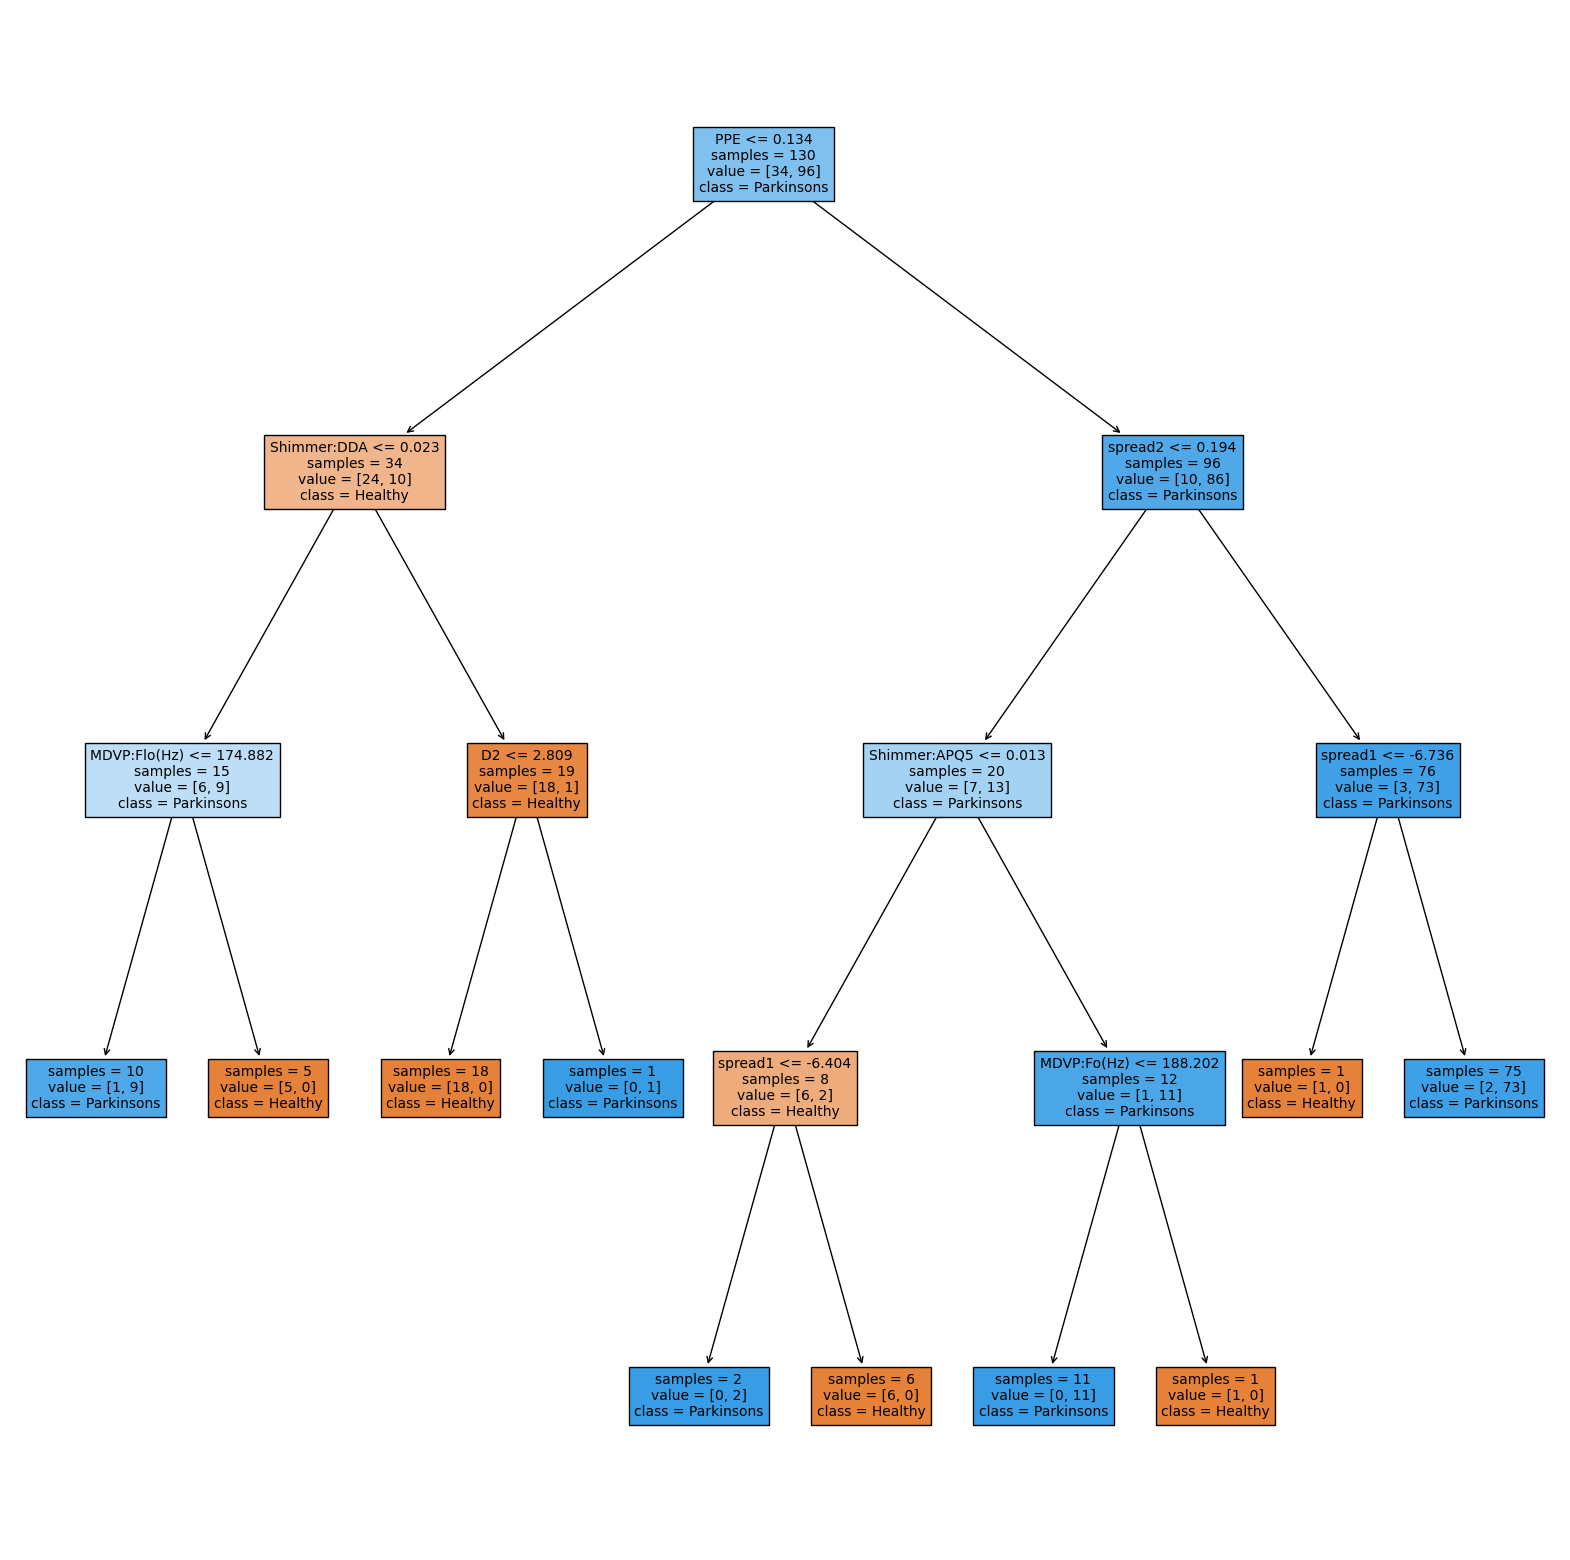

In [16]:
# display pruned tree
fig, ax = plt.subplots(figsize=(20,20))
tree.plot_tree(pruned_tree, 
               feature_names = X_test.columns, 
               class_names = ['Healthy', 'Parkinsons'],
               filled = True,
               fontsize = 10,
               impurity = False,
               ax=ax);

In [17]:
pruned_accuracy = accuracy_score(y_test, pruned_tree.predict(X_test))
print('Classification accuracy: ', pruned_accuracy)

Classification accuracy:  0.9076923076923077


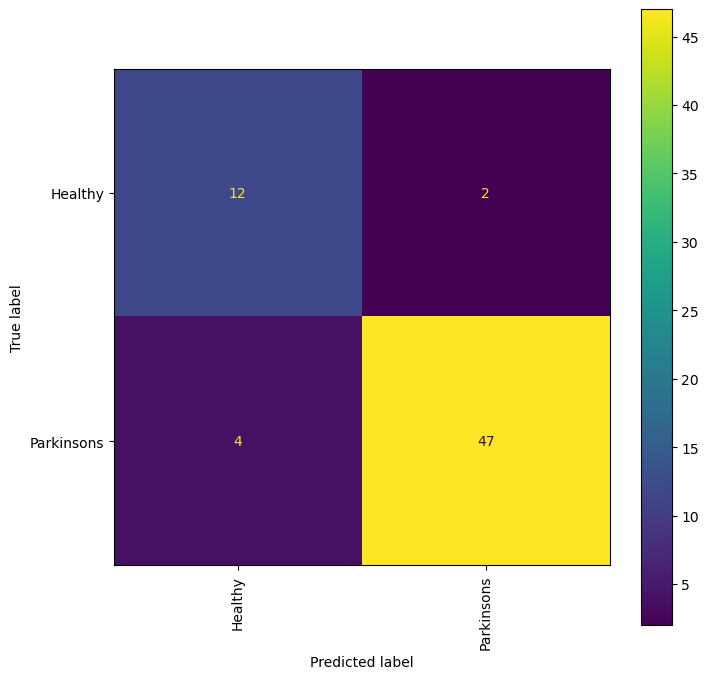

In [25]:
# confusion matrix
y_pred = pruned_tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=['Healthy', 'Parkinsons'])
fig, ax = plt.subplots(figsize=(8,8))
cm_display.plot(ax=ax, xticks_rotation='vertical')